В данной лабораторной работе рассматривается набор данных для прогнозирования сердечной недостаточности. 
Простыми словами сердечная недостаточность — это  синдром, при котором нарушена способность сердца перекачивать кровь.
Набор данных состоит из 918 строк (пациенты) и 12 столбцов (признаки, на основании которых делаем вывод есть сердечная недостаточность или она отсуствует).

Необходимые библиотеки:

In [208]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

Чтение данных

In [209]:

data = pd.read_csv("D:\\heart.csv")

In [210]:
#первые 5 строк нашего датасета
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [211]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0



Описание признаков:


**Age** - возраст пациента [years]

**Sex** - пол пациента [M: Male, F: Female]

**ChestPainType** - тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]

**RestingBP** - кровяное давление в состоянии покоя [mm Hg]

**Cholesterol** - сывороточный холестерин [mm/dl]

**Fasting BS** - уровень сахара в крови натощак [1: если уровень сахара в крови натощак > 120 mg/dl, 0: в противном случае]

**RestingECG** - результаты электрокардиограммы в покое [Normal: нормальный, ST: аномалия зубца ST-T, LVH: веероятная или определенная гипертрофия левого желудочка по критериям Эстеса]

**Max HR** - достигнутая максимальная частота сердечных сокращений [числовое значение от 60 до 202]

**Exercise Angina** - стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]

**Old peak** - пик нагрузки [ST]

**ST_Slope** - наклон сегмента ST пикового упражнения  [Up: восходящий уклон, Flat: плоский, Down: нисходящий уклон]

**Heart Disease** - есть ли сердечная недостаточность   [1: болезнь сердца, 0: норма]


In [212]:
#Всего 918 строк и 12 стобцов
print(data.shape)


(918, 12)


Отобразим список наших признаков:


In [213]:
print(f'{data.columns.tolist()}')

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


Посмотрим информацию по нашим столбцам.

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Посмотрим количество уникальных элементов.


In [215]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

**Визуализация данных и вычисление основных характеристик**

Отделим числовые колонки от нечисловых. Это поможет нам вдальнейшем в анализе.

In [216]:
num_cols = [c for c in data.columns if data[c].dtype =='int64' or data[c].dtype == 'float64']
print(f'Список числовых колонок:\n{num_cols}')

Список числовых колонок:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [217]:

cat_cols = [cname for cname in data.columns if data[cname].dtype =='object']
print(f'Список числовых колонок:\n{cat_cols}')

Список числовых колонок:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Заменим тип 'object' на специальный, предназначенный для хранения категориальных значений:

In [218]:

for i in cat_cols:
    data[i] = data[i].astype('category')

Посмотрим на данные:

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.5 KB


С помощью метода приведенного ниже для каждого количественного признака найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей.


In [220]:
data[num_cols].describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Тоже самое сделаем для категориальных признаков


In [221]:
data[cat_cols].describe(include=['category'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Построим несколько гистограмм, которые продемонстрируют нам количество каждого категориального признака.

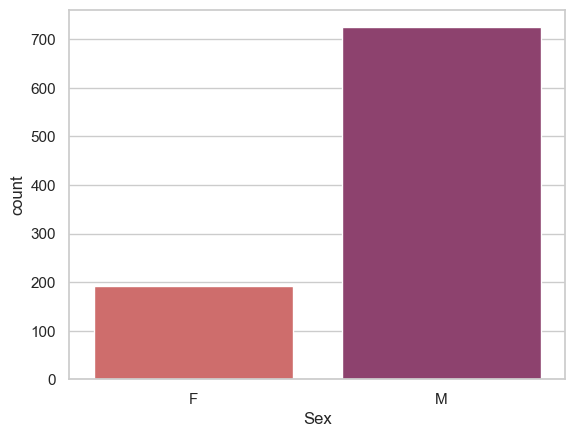

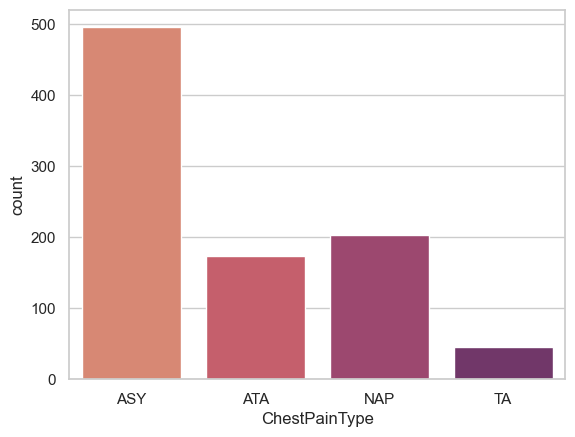

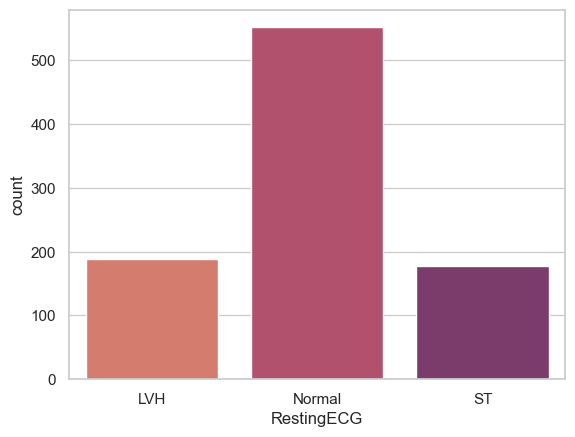

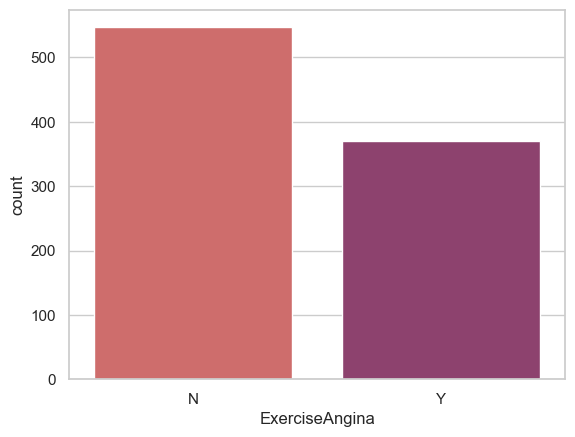

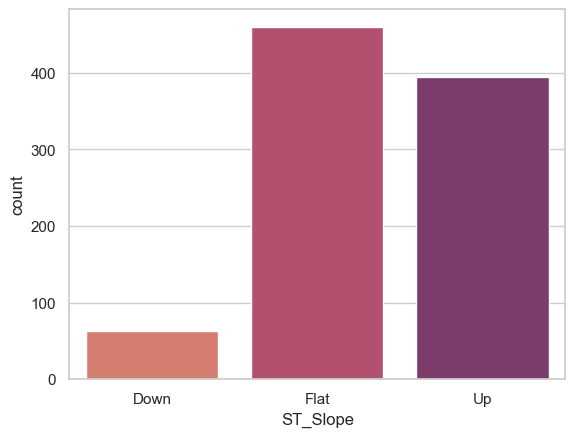

In [222]:
sns.set_theme(style = 'whitegrid')
for i in cat_cols: 
    sns.countplot(data = data, x = i, palette='flare')
    plt.show()

Из соответствующих графиков мы делаем выводы:

 1) Пациентов мужского пола на много больше, чем женского

 2) Основной тип боли в груди, который преобладает в нашей датасете - это бессимптомный (ASY), остальные встречаются реже

 3) Результаты кардиограммы в покое зачастую находятся в пределах нормы у большинства пациентов

 4) Стенокардии, вызванной физической нагрузкой, не подвержены более чем половина пациентов

 5) Наклон сегмента ST пикового упражнения наиболее часто является плоским или же имеет восходящий уклон.

Также для анализа  хотелось бы увидеть графики количества категориальных признаков, сгруппированных по переменной болезни сердца.

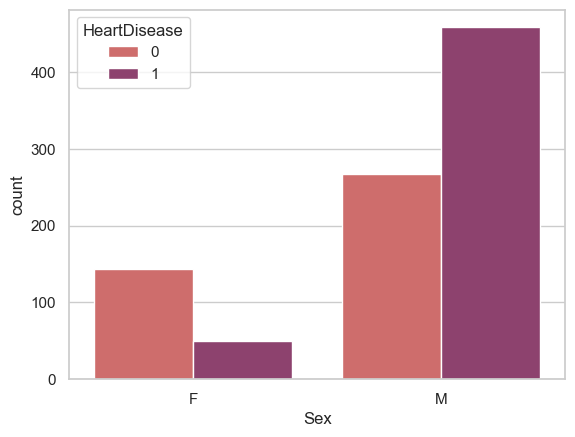

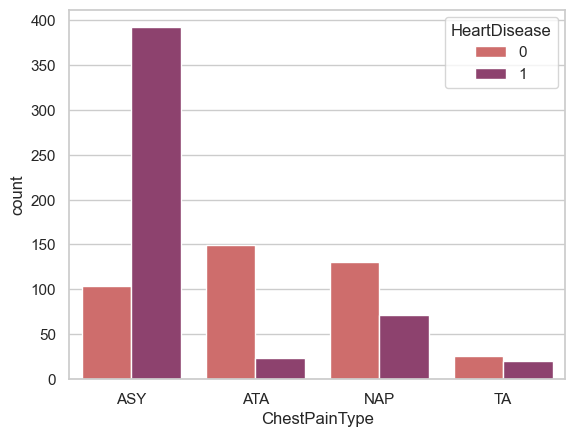

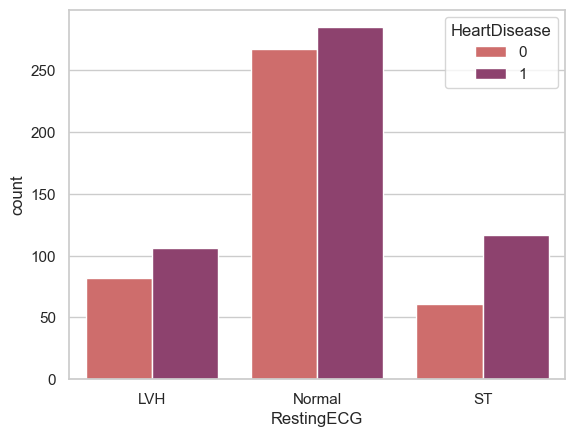

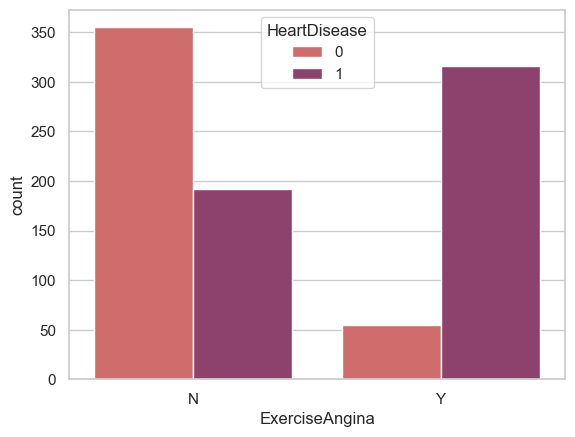

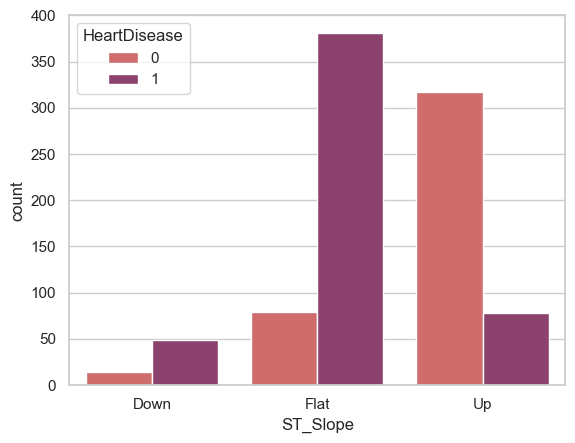

In [223]:
sns.set_theme(style = 'whitegrid')
for i in cat_cols: 
    sns.countplot(data = data, x = i, hue ='HeartDisease', palette='flare')
    plt.show()

Краткое резюме:
- Из первого графика мы видим, что середечная недостаточность преобладает у мужчин больше, чем у женщин.
- Пациенты, у которых не было боли в груди( проходило бессимптомно), на много чаще имели болезнь сердца,но наличие типичной стенокардии также указывало на это, хоть и в меньшей степени.
- Пациенты с нормальными результатами кардиограммы в покое 50/50 были подвержены сердечной недостаточности, а вот c аномалией зубца ST-T немного больше, чем LVH и Normal.
- У людей со стенокардией меньшинство имело норму, в отличии от пацентов без стенокардии.

<Figure size 2000x1500 with 0 Axes>

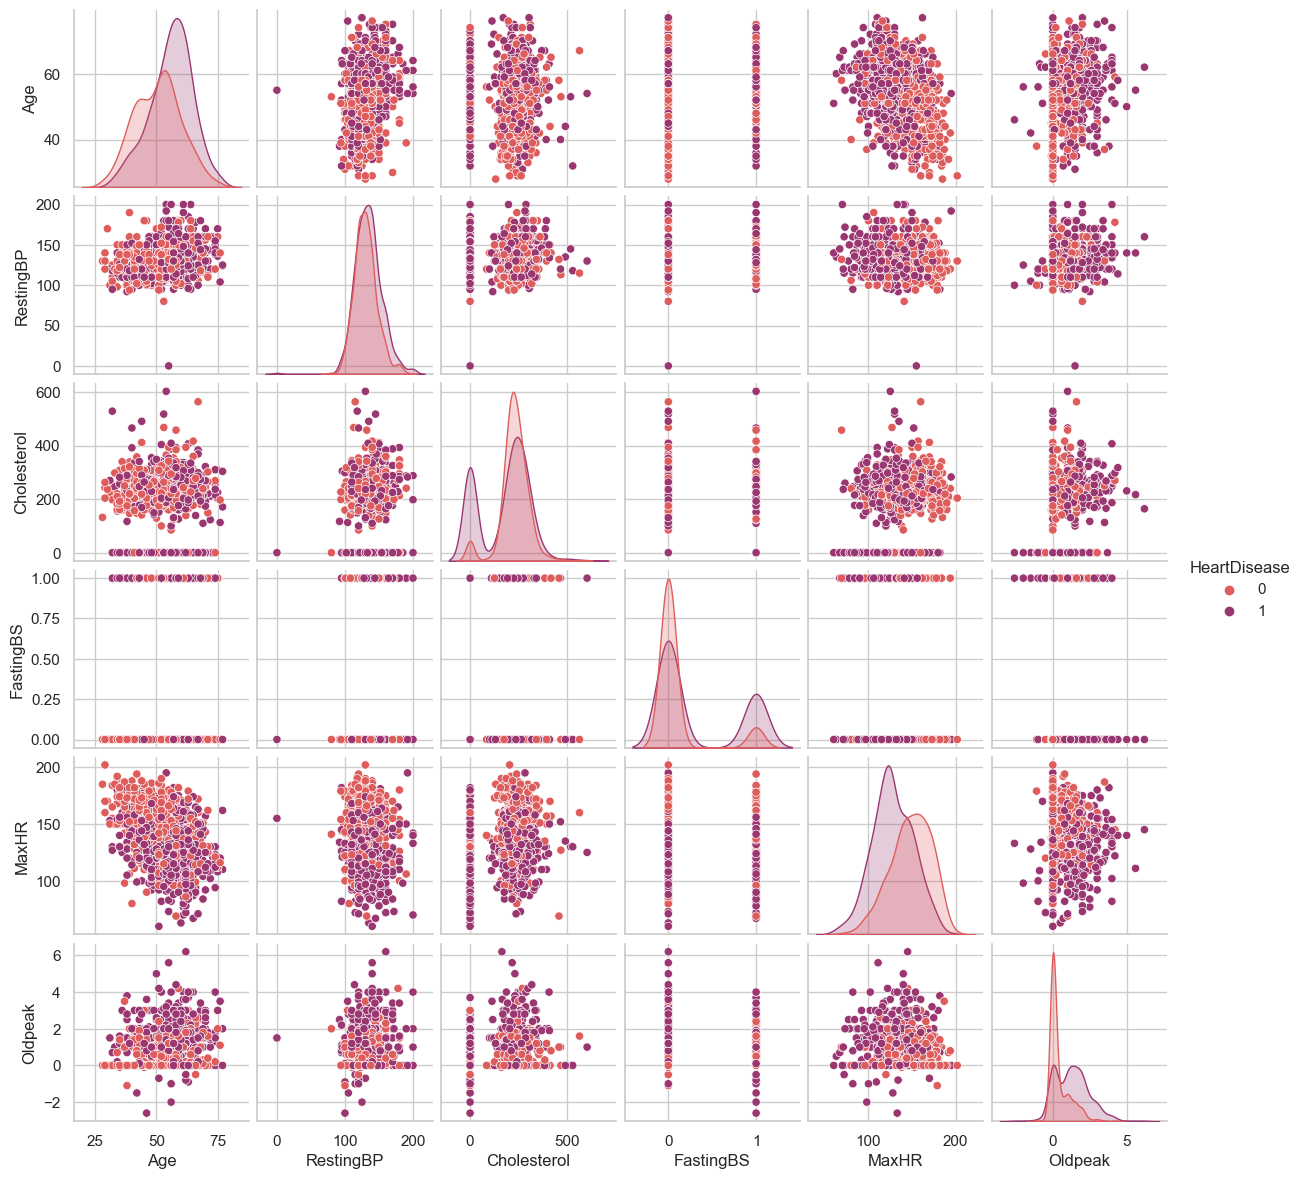

In [224]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=data,hue='HeartDisease',height=2,palette='flare')
plt.show()

Также поступим и для числовых признаков, построив несколько гистограмм:

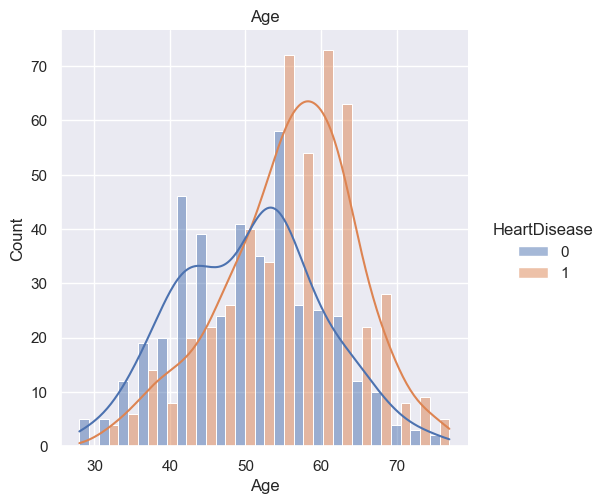

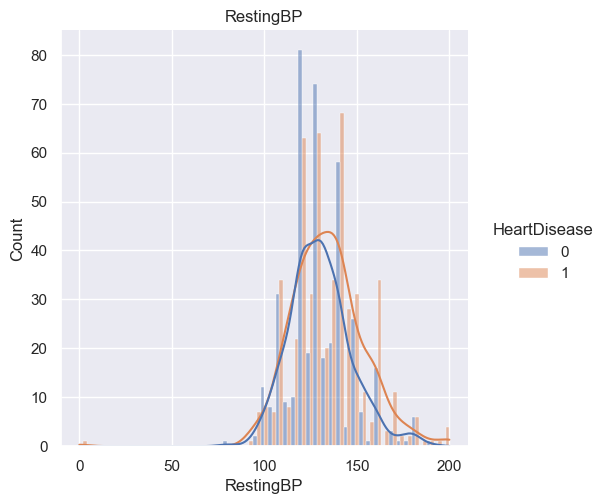

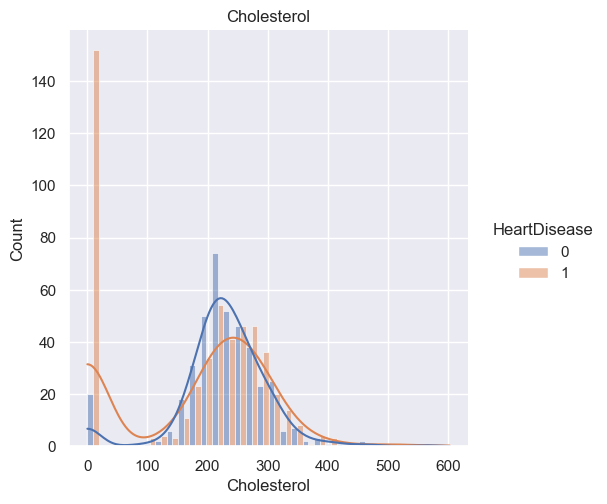

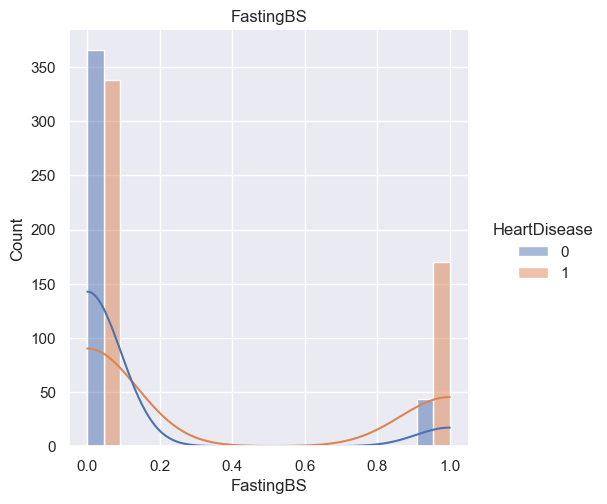

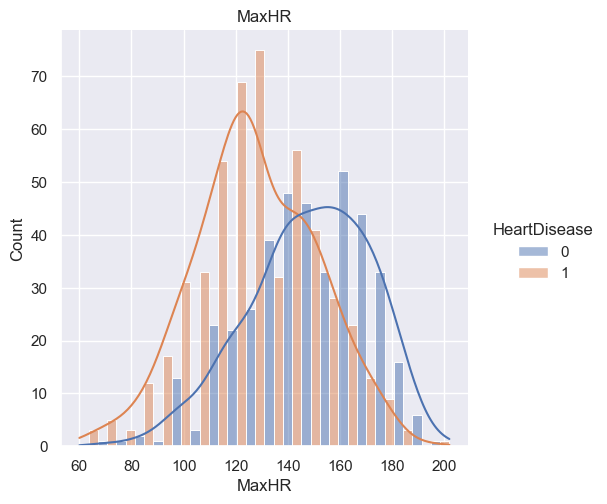

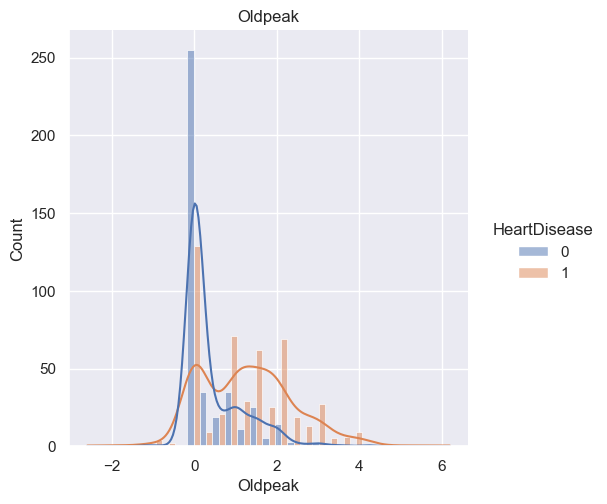

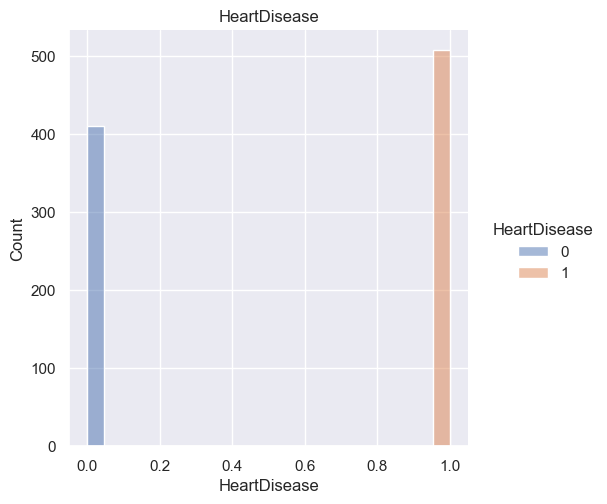

In [225]:
num_colss = num_cols

sns.set_theme(style = 'darkgrid')
for i in num_colss:
            sns.displot(data = data, x = i,hue = 'HeartDisease', multiple='dodge', kde = True)
            plt.title(f'{i}')
            plt.show()

Матрицу корреляции рассмотрим чуть позже ( после обработки категориальных признаков)

**Обработка  пропущенных значений**

Посмотрим количество пропущенных значений в нашем наборе данных.

In [226]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Пропущенные значения отсутствуют.

**Обработка категориальных признаков**

Находим категориальные признаки и используем LabelEncoder(обычная нумерация значений)  для перевода в численные значения

In [227]:

from sklearn.preprocessing import LabelEncoder

data_new = data.copy()
encoder = LabelEncoder()

for i in cat_cols:
    data_new[i] = encoder.fit_transform(data_new[i])


In [228]:
data_new.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [229]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


Теперь мы можем построить матрицу корреляции

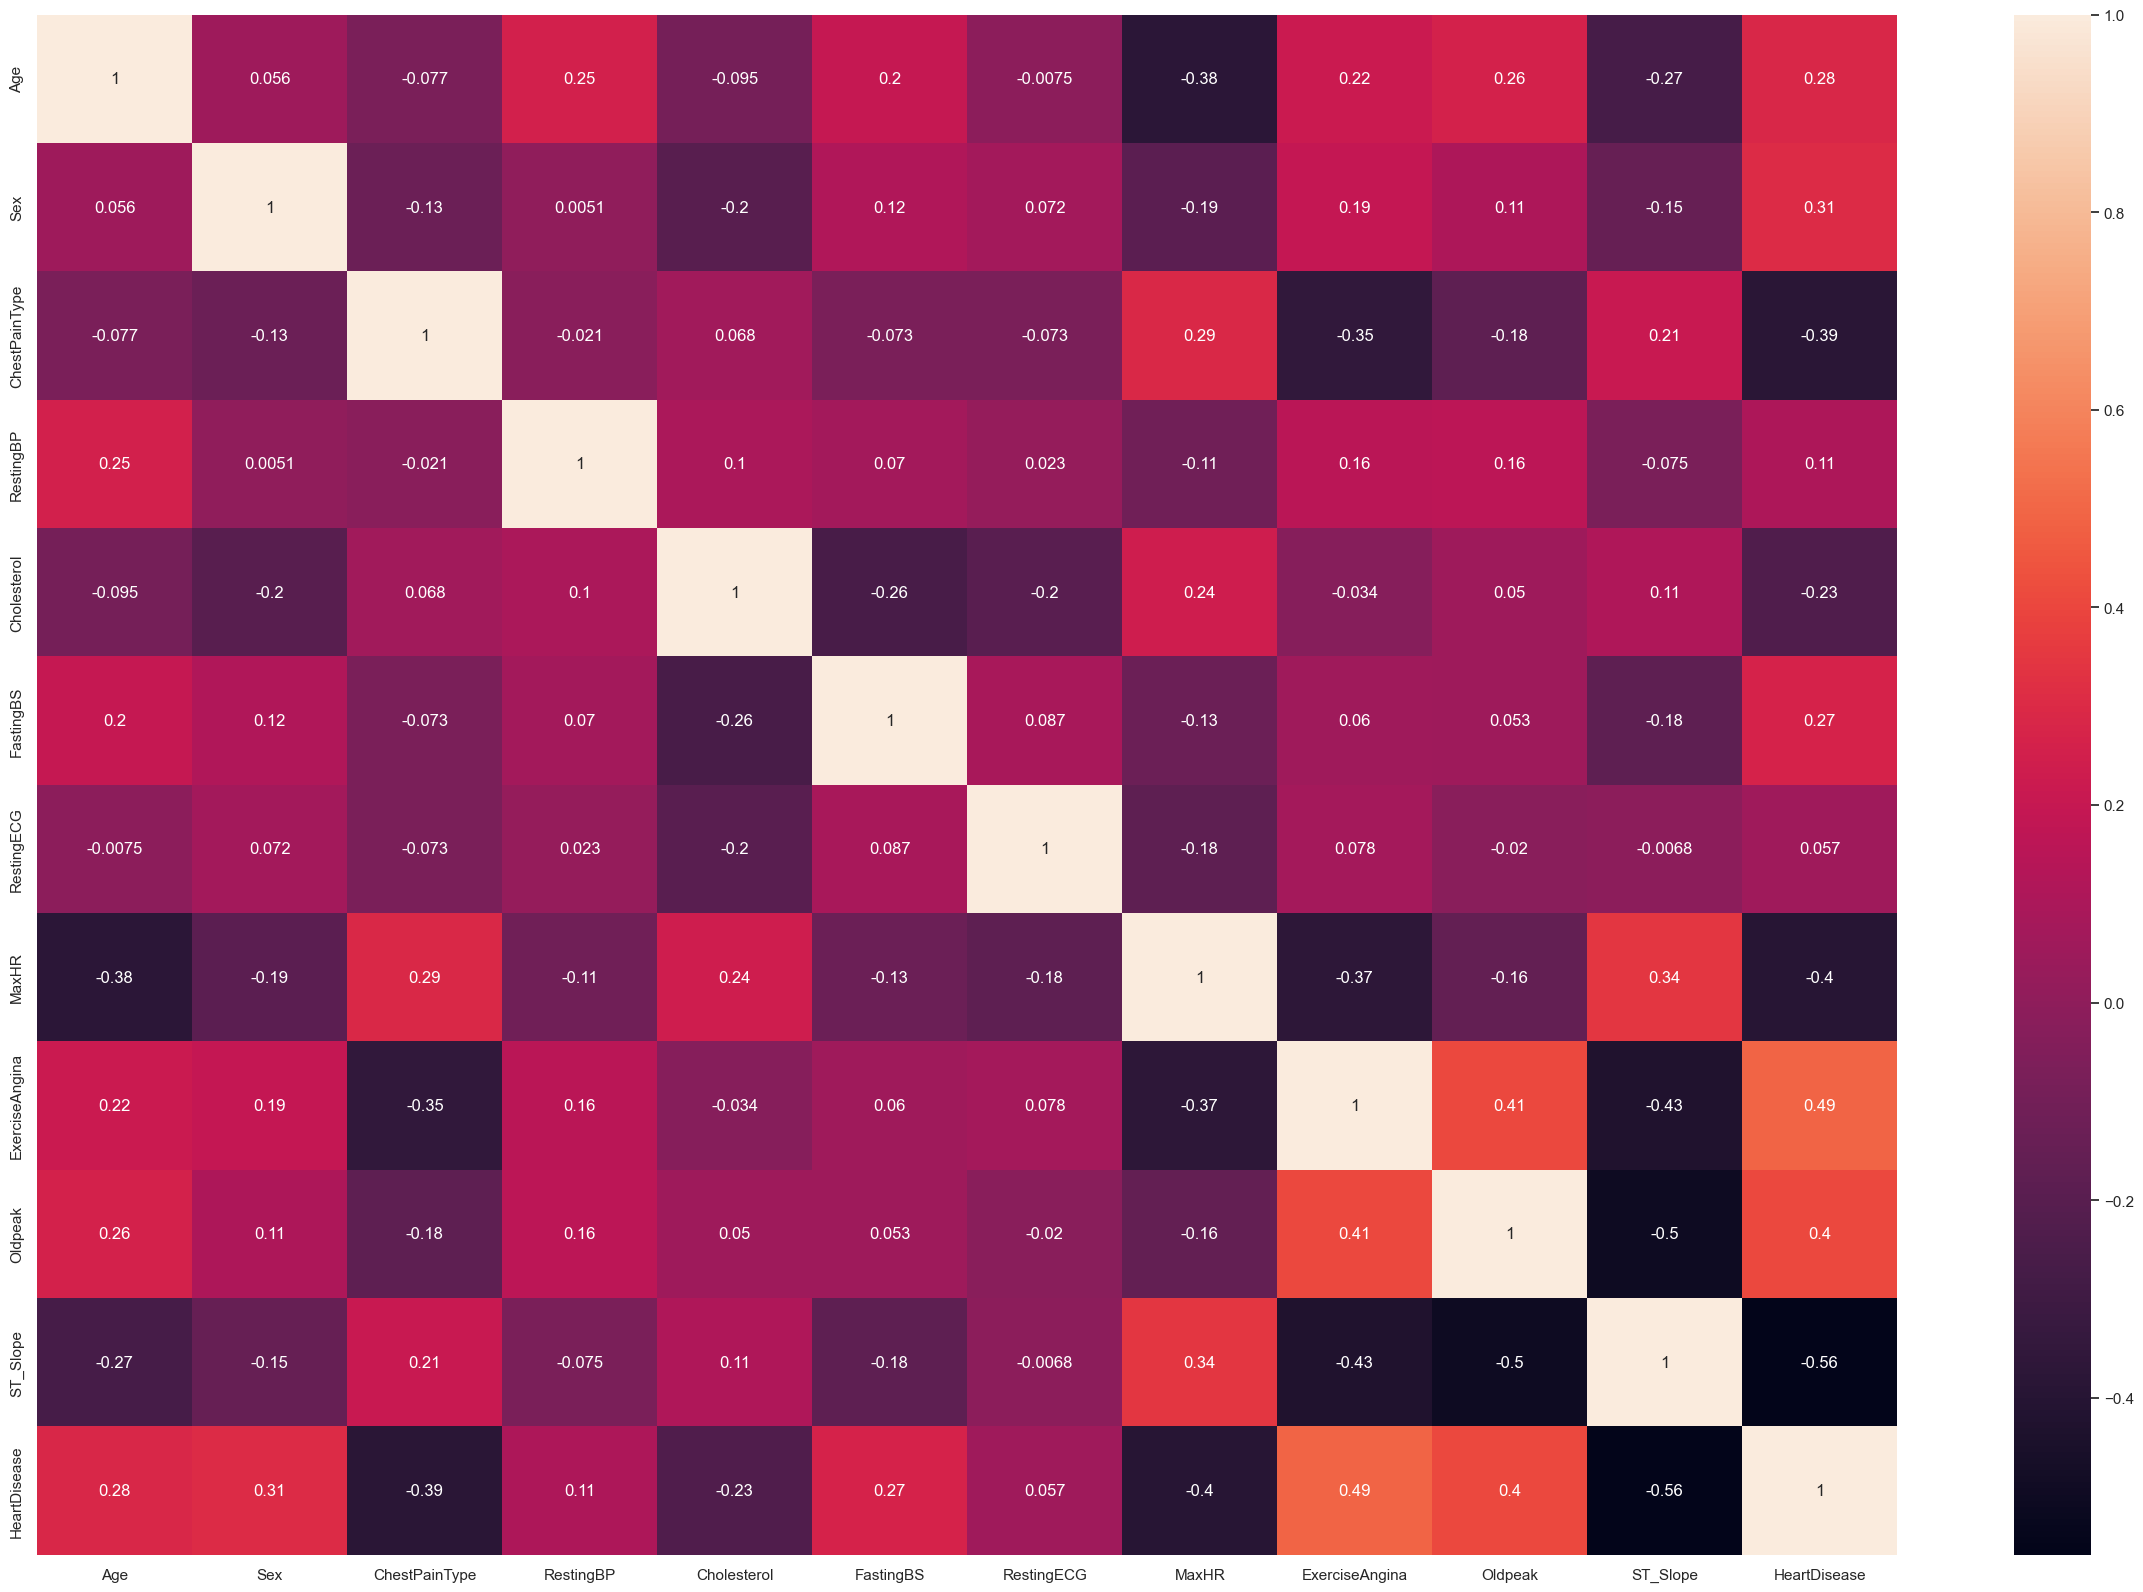

In [230]:
mask = np.zeros_like(data_new.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(data_new.corr(), annot = True, cmap = 'rocket')

Некоторые виды коэффициентов корреляции могут быть положительными или отрицательными.Отрицательная корреляция — корреляция, при которой увеличение одной переменной связано с уменьшением другой. 

В данной работе наиболее сильная положительная корреляция (0.49) наблюдается между HeartDisease ( наличие сердечной недостаточности ) и ExerciseAngina ( наличие стенокардии, вызванной физической нагрузкой).
Наиболее сильная отрицательная корреляция ( -0.56) между HeartDisease ( наличие сердечной недостаточности ) и ST_Slope (наклон сегмента ST ), а также (-0.5) между  ST_Slope (наклон сегмента ST)   и  Oldpeak (пик нагрузки).

**Наличие выбросов**

Произведем подсчет количества значений в каждой колонке:

In [231]:
for i in data_new.columns:
    print(f' Признак {i}:\n{data_new[i].value_counts()}\n')


 Признак Age:
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

 Признак Sex:
1    725
0    193
Name: Sex, dtype: int64

 Признак ChestPainType:
0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

 Признак RestingBP:
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

 Признак Cholesterol:
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, 

Построим для некоторых признаков соответствующие графики boxplot.

Boxplot - это стандартизированный способ отображения набора данных на основе сводки из пяти чисел: минимума, максимума, медианы выборки и первого и третьего квартилей.

<AxesSubplot: >

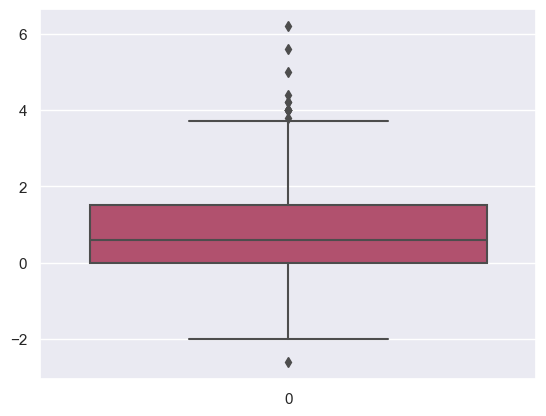

In [160]:
sns.boxplot(data_new['Oldpeak'], palette='flare')

In [161]:
IQR = data_new['Oldpeak'].quantile(0.75) - data_new['Oldpeak'].quantile(0.25)
lower_bound = data_new['Oldpeak'].quantile(0.25)-3*IQR
upper_bound = data_new['Oldpeak'].quantile(0.75)+3*IQR

data_new = data_new[data_new['Oldpeak'] <= upper_bound ]
data_new = data_new[data_new['Oldpeak'] >= lower_bound ]

<AxesSubplot: >

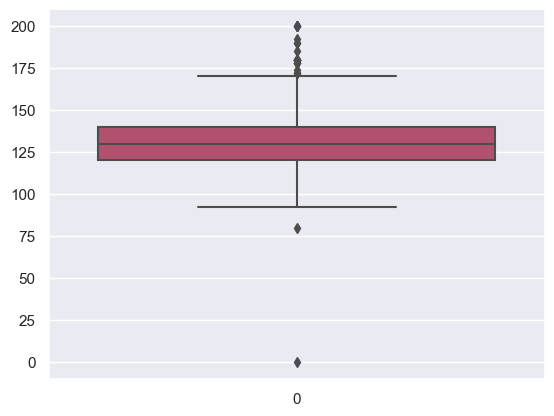

In [162]:
sns.boxplot(data_new['RestingBP'], palette='flare')

In [163]:
IQR = data_new['RestingBP'].quantile(0.75) - data_new['RestingBP'].quantile(0.25)
lower_bound = data_new['RestingBP'].quantile(0.25)-3*IQR
upper_bound = data_new['RestingBP'].quantile(0.75)+3*IQR

data_new = data_new[data_new['RestingBP'] <= upper_bound ]
data_new = data_new[data_new['RestingBP'] >= lower_bound ]

<AxesSubplot: >

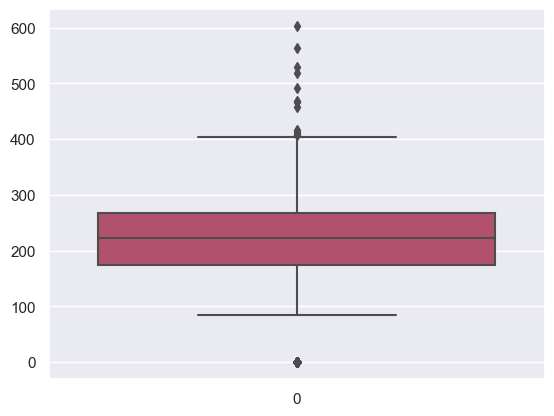

In [164]:
sns.boxplot(data_new['Cholesterol'], palette='flare')

In [165]:
IQR = data_new['Cholesterol'].quantile(0.75) - data_new['Cholesterol'].quantile(0.25)
lower_bound = data_new['Cholesterol'].quantile(0.25)-3*IQR
upper_bound = data_new['Cholesterol'].quantile(0.75)+3*IQR

data_new = data_new[data_new['Cholesterol'] <= upper_bound ]
data_new = data_new[data_new['Cholesterol'] >= lower_bound ]

**Нормализация признаков с помощью линейного преобразования:**



In [232]:
data_normal = (data_new - data_new.min(axis=0)) / (data_new.max(axis=0) - data_new.min(axis=0))
data_normal.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.789760,0.260349,0.661983,0.329684,0.233115,0.494553,0.540911,0.404139,0.396291,0.680828,0.553377
std,0.192502,0.407701,0.318840,0.092571,0.181400,0.423046,0.315836,0.179298,0.490992,0.121201,0.303528,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.000000,0.600000,0.287313,0.000000,0.500000,0.422535,0.000000,0.295455,0.500000,0.000000
50%,0.530612,1.000000,0.000000,0.650000,0.369818,0.000000,0.500000,0.549296,0.000000,0.363636,0.500000,1.000000
75%,0.653061,1.000000,0.666667,0.700000,0.442786,0.000000,0.500000,0.676056,1.000000,0.465909,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Разбиение данных на обучающую и тестовую выборки**

In [233]:
from sklearn.model_selection import train_test_split

X = data_normal.drop('HeartDisease', axis = 1)
y = data_normal['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

Посмотрим на баланс классов в test и train:

In [234]:
from collections import Counter
counter1 = Counter(y_train)
counter2 = Counter(y_test)
print(counter1, counter2)

Counter({1.0: 398, 0.0: 336}) Counter({1.0: 110, 0.0: 74})


Данные более менее сбалансированы, поэтому дополнительная балансировка не нужна.

Перед тем как работать с алгоритмами давайте определимся с метриками. Так как в данной работе разбирается задача классификации сердечной недостаточности, то наша модель должна угадать как можно больше людей с сердечной недостаточностью, когда у них на самом деле сердечная недостаточность, и соответственно минимизировать кол - во прогнозов отсутствия сердечной недостаточности, если у человека на самом деле сердечная недостаточность ( нужно совершать как можно меньше промахов).

Будем ориентироваться на такие метрики как:

- recall
 
Полнота (recall) – пропорция всех верно-положительно предсказанных объектов к общему количеству действительно положительных.  То есть, полнота показывает сколько образцов из всех положительных примеров были классифицированы правильно. Чем выше значение полноты, тем меньше положительных примеров пропущено в классификации.

- AUC_ROC

Площадь под ROC-кривой (Area Under Curve – площадь под кривой) – это метрика оценки для задач бинарной классификации. Площадь под кривой (AUC) является мерой способности классификатора различать классы. 

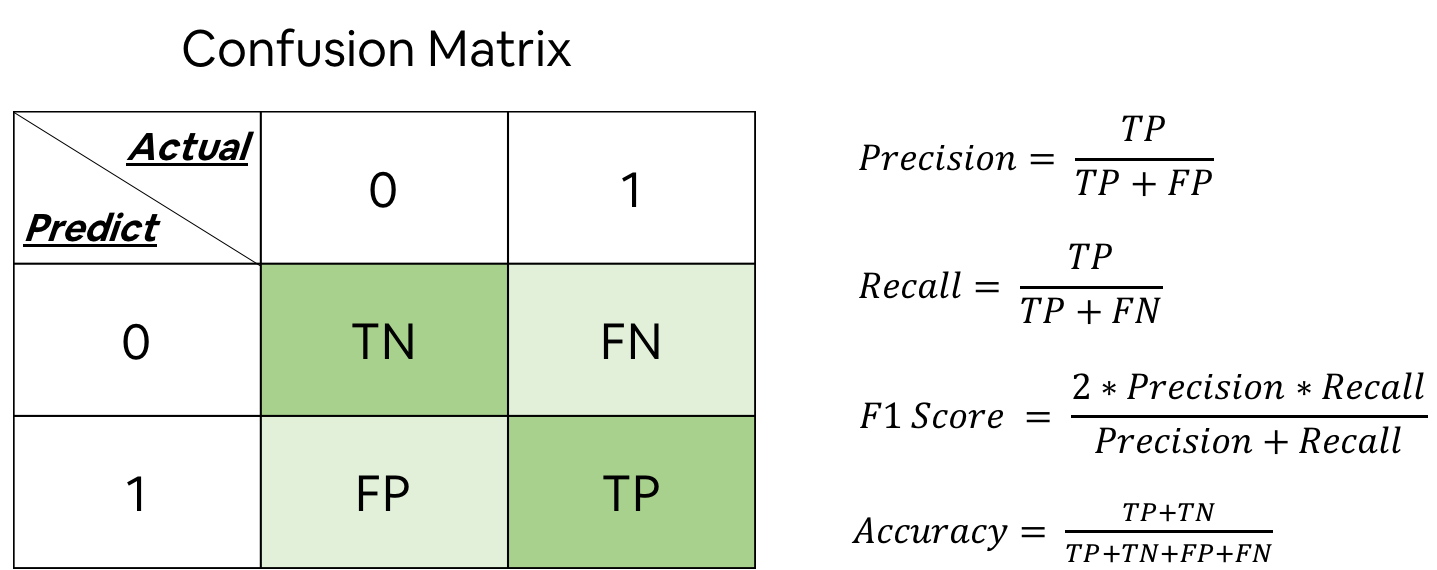

Создадим функцию для удобного подбора параметров по сетке

In [235]:
from sklearn.model_selection import GridSearchCV


def cv_params(model, param_grid):
    scoring = 'recall'
    opt_params = GridSearchCV(
      estimator = model, # модель
      param_grid = param_grid, # параметры
      scoring = scoring, # стратегия валидаци
      cv = 5,#количество слоев кросс - валидации
      n_jobs = -1 ) 
    opt_params.fit(X_train,y_train)
    params = opt_params.best_params_
    best_score = opt_params.best_score_

    print(f'Best score:{round(best_score,2)}')
    print(f'Best parameters:{params}\n')

    return params
  

Параметры для KNeighborsClassifier

In [236]:
from sklearn.neighbors import KNeighborsClassifier
knn_param_grid = {
    'n_neighbors': np.arange(1,30), 
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
    
}
knn_clean = KNeighborsClassifier()
knn_params = cv_params(knn_clean,knn_param_grid)

Best score:0.9
Best parameters:{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}



Параметры для RandomForestClassifier

In [237]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    'max_depth':[20,25,30,35,40],
    'n_estimators':[400,600,800]
}
rf_clean = RandomForestClassifier()
rf_params = cv_params(rf_clean,rf_param_grid)

Best score:0.9
Best parameters:{'max_depth': 30, 'n_estimators': 800}



Параметры для LGBMClassifier

LightGBM – это классификатор повышения градиента в машинном обучении, который использует древовидные алгоритмы обучения. Он спроектирован так, чтобы быть распределенным и эффективным с более высокой скоростью привода и более высокой эффективностью, меньшим использованием памяти и большей точностью.

In [238]:
import lightgbm
lgb_param_grid = {
    'max_depth':[4,10,15,20],
    'num_leaves':[25,25,45],
    'n_estimators':[41,100,250,500,600]
}
lgb_clean =lightgbm.LGBMClassifier(random_state=1)
lgb_params = cv_params(lgb_clean,lgb_param_grid)

Best score:0.9
Best parameters:{'max_depth': 15, 'n_estimators': 41, 'num_leaves': 25}



Параметры для LogisticRegression()

In [239]:
from sklearn.linear_model import LogisticRegression
logreg_param_grid = {
    'solver': ['lbfgs'],
    'random_state':[0,1,2],
    'max_iter':[200,300,400,600],

}
logreg_clean = LogisticRegression()
logreg_params = cv_params(logreg_clean, logreg_param_grid)

Best score:0.86
Best parameters:{'max_iter': 200, 'random_state': 0, 'solver': 'lbfgs'}



Параметры для неглубокой нейронной сети MLPClassifier()

In [240]:
from sklearn.neural_network import MLPClassifier
mlp_param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'adam'],
    'learning_rate':['constant', 'invscaling', 'adaptive'],
    'max_iter':[200,400,600,1000],
    
}
mlp_clean = MLPClassifier(hidden_layer_sizes = (200,), random_state=42)
mlp_params = cv_params(mlp_clean,mlp_param_grid)

Best score:0.88
Best parameters:{'activation': 'relu', 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}



C:\Users\Stepan\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Теперь нам известны параметры, на которых модели дают наилучший результат. Обучим модели на этих параметрах, посмотрим ошибку и замерим время.

In [241]:
import time
knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train,y_train)
start_time = time.time()
pred_knn = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_knn_train)
error_test  = np.mean(y_test  != pred_knn)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на train = {error_train}')
print(f'Ошибка на test = {error_test}')
print(f'Время = {runtime}')


Ошибка на train = 0.0
Ошибка на test = 0.09239130434782608
Время = 0.0019948482513427734


In [242]:
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_knn)*100,4)} ')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_knn)*100,4)} ')
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_knn)*100,4)}')
print('\n')
print(f'Значение AUC_ROC на тренировочной выборке: {round(roc_auc_score(y_train,pred_knn_train)*100,4)} ')
print(f'Значение recall на тренировочной выборке: {round(recall_score(y_train,pred_knn_train)*100,4)} ')
print(f'Точность на тренировочной выборке: {round(accuracy_score(y_train,pred_knn_train)*100,4)}')

Значение AUC_ROC на тестовой выборке: 90.2826 
Значение recall на тестовой выборке: 92.7273 
Точность на тестовой выборке 90.7609


Значение AUC_ROC на тренировочной выборке: 100.0 
Значение recall на тренировочной выборке: 100.0 
Точность на тренировочной выборке: 100.0


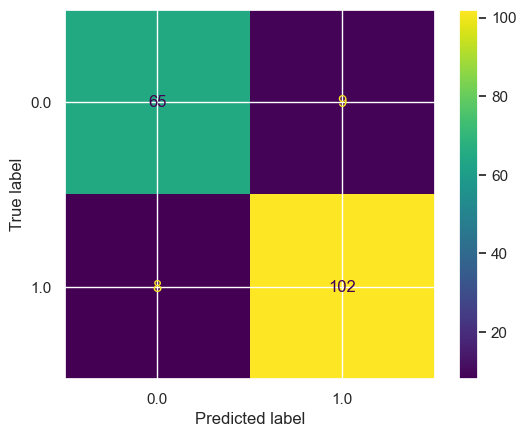

In [243]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_knn)

Ради интереса рассмотрим график зависимости полноты от количества соседей. Может нам удастся ещё сильнее поднять качетсво?

In [244]:
recall_list_train = []
recall_list_test = []
for i in range(1, 51):
    KNN = KNeighborsClassifier(n_neighbors=i,metric='manhattan',weights='uniform')
    KNN.fit(X_train, y_train)
    pred_knn = KNN.predict(X_test)
    pred_knn_train = KNN.predict(X_train)
    recall_train = round(recall_score(y_train,pred_knn_train)*100, 4)
    recall_list_train.append(recall_train)
    
    recall_test = round(recall_score(y_test,pred_knn)*100, 4)
    recall_list_test.append(recall_test)

Text(0, 0.5, 'recall, %')

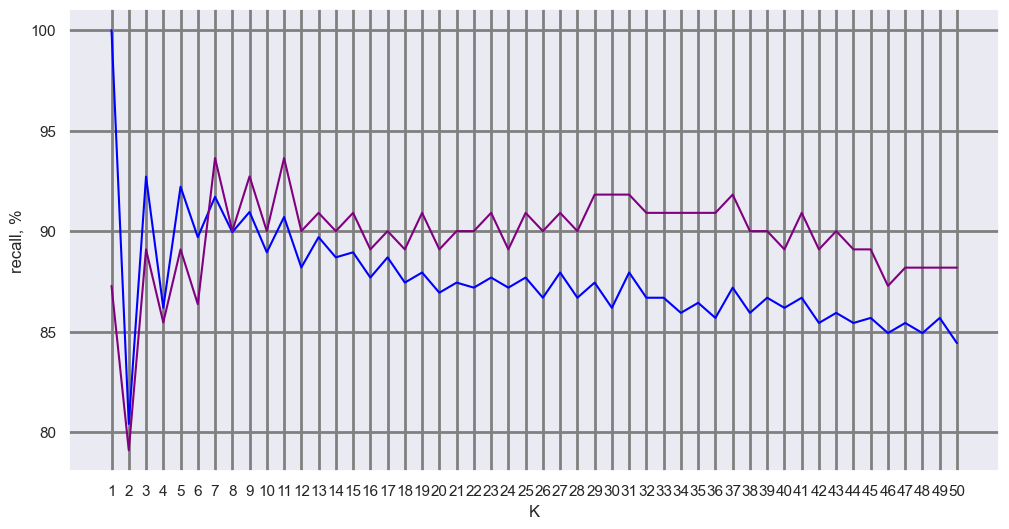

In [245]:
k = np.arange(1, 51)
plt.figure(figsize=(12, 6))
plt.plot(k, recall_list_train, 'blue')
plt.plot(k, recall_list_test, 'purple')
plt.xlabel('K')
plt.xticks(np.arange(min(k), max(k)+1, 1))
plt.grid(color='grey', linestyle='-', linewidth=2)
plt.ylabel('recall, %')

Оптимальное количество соседей и достигаемая полнота на тесте:

In [246]:
for i in range(0,50):
    if recall_list_test[i] == np.max(recall_list_test):
        print(f'k =  {i+1} , полнота =  {recall_list_test[i]}')

k =  7 , полнота =  93.6364
k =  11 , полнота =  93.6364


Обучим на оптимальных параметрах и посмотрим на результаты:


In [263]:
import time
knn = KNeighborsClassifier(n_neighbors=7,metric='manhattan',weights='uniform')
knn.fit(X_train,y_train)
start_time = time.time()
pred_knn = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_knn_train)
error_test  = np.mean(y_test  != pred_knn)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на train = {error_train}')
print(f'Ошибка на test = {error_test}')
print(f'Время = {runtime}')


Ошибка на train = 0.11852861035422343
Ошибка на test = 0.09239130434782608
Время = 0.0009968280792236328


In [264]:
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_knn)*100,4)} ')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_knn)*100,4)} ')
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_knn)*100,4)}')
print('\n')
print(f'Значение AUC_ROC на тренировочной выборке: {round(roc_auc_score(y_train,pred_knn_train)*100,4)} ')
print(f'Значение recall на тренировочной выборке: {round(recall_score(y_train,pred_knn_train)*100,4)} ')
print(f'Точность на тренировочной выборке: {round(accuracy_score(y_train,pred_knn_train)*100,4)}')

Значение AUC_ROC на тестовой выборке: 90.0614 
Значение recall на тестовой выборке: 93.6364 
Точность на тестовой выборке 90.7609


Значение AUC_ROC на тренировочной выборке: 87.8186 
Значение recall на тренировочной выборке: 91.7085 
Точность на тренировочной выборке: 88.1471


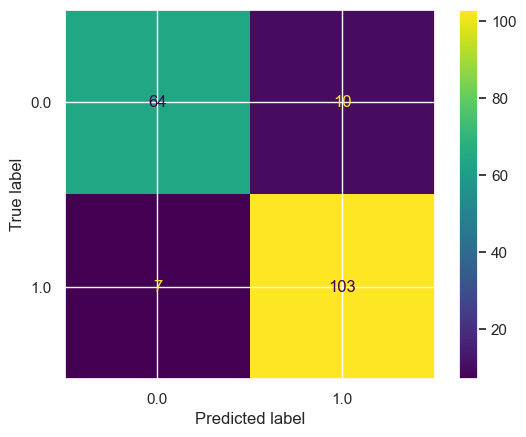

In [265]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_knn)

In [247]:

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train,y_train)
start_time = time.time()
pred_rf = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_rf_train)
error_test  = np.mean(y_test  != pred_rf)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на train = {error_train}')
print(f'Ошибка на test = {error_test}')
print(f'Время = {runtime}')


Ошибка на train = 0.0
Ошибка на test = 0.10869565217391304
Время = 0.000997304916381836


In [248]:
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_rf)*100,4)} ')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_rf)*100,4)} ')
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_rf)*100,4)}')
print('\n')
print(f'Значение AUC_ROC на тренировочной выборке: {round(roc_auc_score(y_train,pred_rf_train)*100,4)} ')
print(f'Значение recall на тренировочной выборке: {round(recall_score(y_train,pred_rf_train)*100,4)} ')
print(f'Точность на тренировочной выборке: {round(accuracy_score(y_train,pred_rf_train)*100,4)}')

Значение AUC_ROC на тестовой выборке: 88.9189 
Значение recall на тестовой выборке: 90.0 
Точность на тестовой выборке 89.1304


Значение AUC_ROC на тренировочной выборке: 100.0 
Значение recall на тренировочной выборке: 100.0 
Точность на тренировочной выборке: 100.0


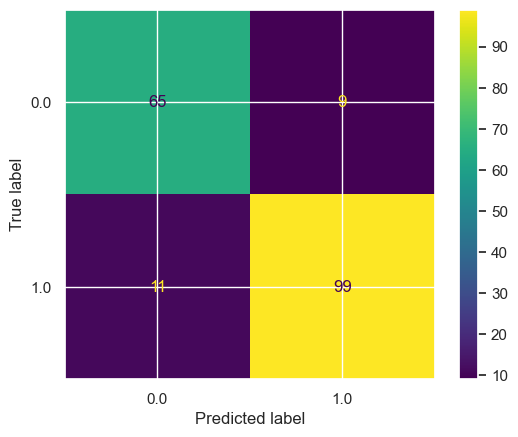

In [249]:

ConfusionMatrixDisplay.from_predictions(y_test, pred_rf)

In [250]:

lgb = lightgbm.LGBMClassifier(**lgb_params)
lgb.fit(X_train,y_train)
start_time = time.time()
pred_lgb = lgb.predict(X_test)
pred_lgb_train = lgb.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_lgb_train)
error_test  = np.mean(y_test  != pred_lgb)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на train = {error_train}')
print(f'Ошибка на test = {error_test}')
print(f'Время = {runtime}')

Ошибка на train = 0.039509536784741145
Ошибка на test = 0.09239130434782608
Время = 0.0019941329956054688


In [251]:
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_lgb)*100,4)} ')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_lgb)*100,4)} ')
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_lgb)*100,4)}')
print('\n')
print(f'Значение AUC_ROC на тренировочной выборке: {round(roc_auc_score(y_train,pred_lgb_train)*100,4)} ')
print(f'Значение recall на тренировочной выборке: {round(recall_score(y_train,pred_lgb_train)*100,4)} ')
print(f'Точность на тренировочной выборке: {round(accuracy_score(y_train,pred_lgb_train)*100,4)}')

Значение AUC_ROC на тестовой выборке: 90.2826 
Значение recall на тестовой выборке: 92.7273 
Точность на тестовой выборке 90.7609


Значение AUC_ROC на тренировочной выборке: 95.9395 
Значение recall на тренировочной выборке: 97.2362 
Точность на тренировочной выборке: 96.049


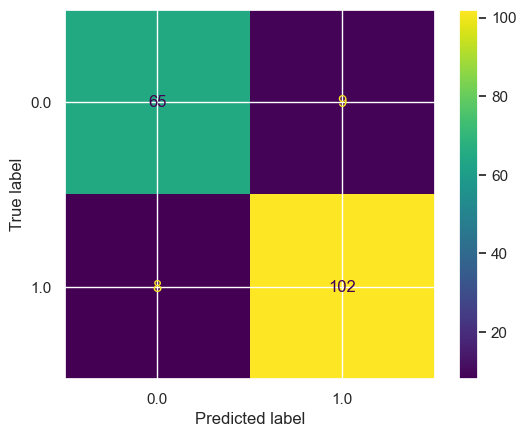

In [252]:

ConfusionMatrixDisplay.from_predictions(y_test, pred_lgb)

In [253]:
logr = LogisticRegression(**logreg_params)
logr.fit(X_train,y_train)
start_time = time.time()
pred_logr = logr.predict(X_test)
pred_logr_train = logr.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_logr_train)
error_test  = np.mean(y_test  != pred_logr)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.16076294277929154
Ошибка на тесте  = 0.09782608695652174
Время работы = 0.0009963512420654297


In [266]:
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_logr)*100,4)} ')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_logr)*100,4)} ')
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_logr)*100,4)}')


Значение AUC_ROC на тестовой выборке: 90.0491 
Значение recall на тестовой выборке: 90.9091 
Точность на тестовой выборке 90.2174


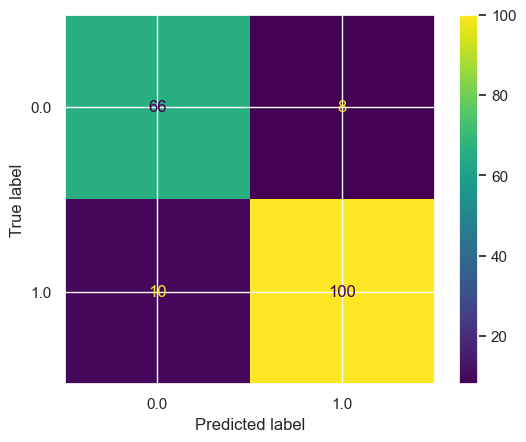

In [255]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_logr)

In [256]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(**mlp_params)
mlp.fit(X_train,y_train)
start_time = time.time()
pred_mlp = mlp.predict(X_test)
pred_mlp_train = mlp.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_mlp_train)
error_test  = np.mean(y_test  != pred_mlp)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.0885558583106267
Ошибка на тесте  = 0.10869565217391304
Время работы = 0.0009975433349609375


C:\Users\Stepan\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [257]:
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_mlp)*100,4)} ')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_mlp)*100,4)} ')
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_mlp)*100,4)}')
print('\n')
print(f'Значение AUC_ROC на тренировочной выборке: {round(roc_auc_score(y_train,pred_mlp_train)*100,4)} ')
print(f'Значение recall на тренировочной выборке: {round(recall_score(y_train,pred_mlp_train)*100,4)} ')
print(f'Точность на тренировочной выборке: {round(accuracy_score(y_train,pred_mlp_train)*100,4)}')

Значение AUC_ROC на тестовой выборке: 88.6978 
Значение recall на тестовой выборке: 90.9091 
Точность на тестовой выборке 89.1304


Значение AUC_ROC на тренировочной выборке: 90.9533 
Значение recall на тренировочной выборке: 93.2161 
Точность на тренировочной выборке: 91.1444


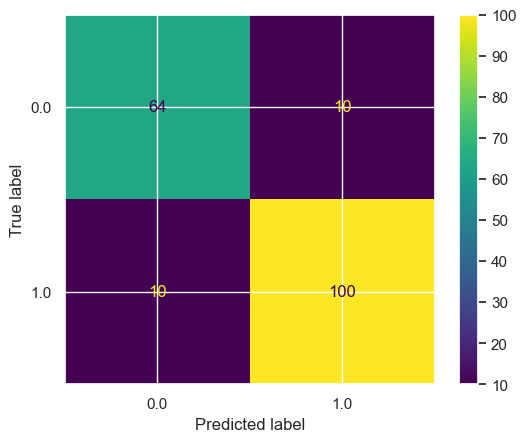

In [258]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_mlp)

Посмотрим на график зависимости ошибки от параметра альфа и найдем оптимальный параметр.

C:\Users\Stepan\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


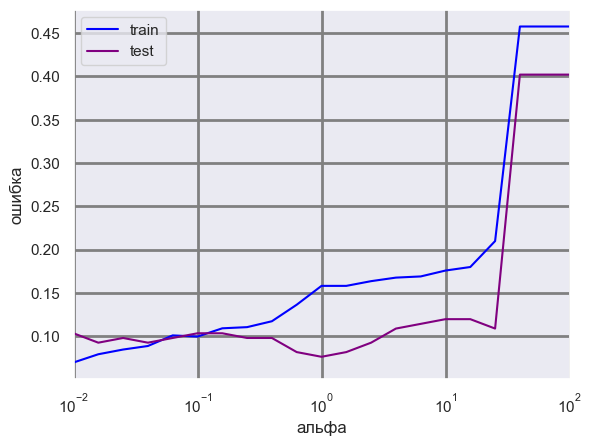

In [259]:
alpha_list = np.logspace(-2, 2, 21)

train_error = []
test_error = []

for alpha in alpha_list:
    mlp = MLPClassifier(alpha = alpha,hidden_layer_sizes = (200,), random_state=42,
                        activation='relu', learning_rate='constant', max_iter=1000, solver='adam')
    mlp.fit(X_train, y_train)

    y_train_mlp = mlp.predict(X_train)
    y_test_mlp = mlp.predict(X_test)
    
    train_error.append(np.mean(y_train != y_train_mlp))
    test_error.append(np.mean(y_test != y_test_mlp))
    
plt.semilogx(alpha_list, train_error, 'blue', label = 'train')
plt.semilogx(alpha_list, test_error, 'purple', label = 'test')
plt.xlim([np.min(alpha_list), np.max(alpha_list)])
plt.grid(color='grey', linestyle='-', linewidth=2)
plt.xlabel('альфа')
plt.ylabel('ошибка')
plt.legend()

In [260]:
alp = alpha_list[test_error == np.min(test_error)]
print('Оптимальный параметр альфа = ', alp)

Оптимальный параметр альфа =  [1.]


Аналогично построим график зависимости ошибки от количества нейронов в скрытом слое:

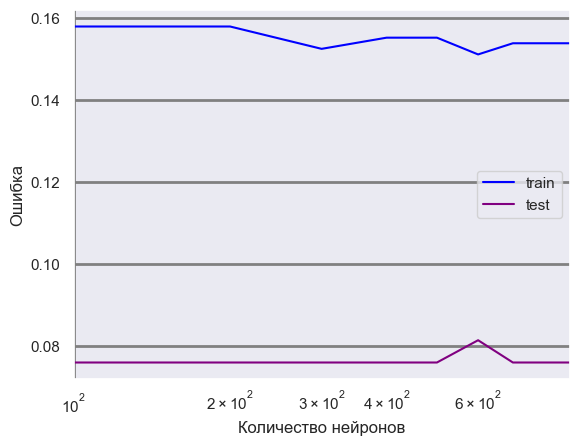

In [273]:
n_list = np.array([i for i in range(100, 1000, 100)])

train_error = []
test_error = []

for neurons in n_list:
    mlp = MLPClassifier(alpha = alp[0], hidden_layer_sizes = (neurons,), 
                            random_state=42, activation='relu', learning_rate='constant', max_iter=1000, solver='adam')
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
 
    train_error.append(np.mean(y_train != y_train_pred))
    test_error.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(n_list, train_error, 'blue', label = 'train')
plt.semilogx(n_list, test_error, 'purple', label = 'test')
plt.xlim([np.min(n_list), np.max(n_list)])
plt.xlabel('Количество нейронов')
plt.ylabel('Ошибка')
plt.grid(color='grey', linestyle='-', linewidth=2)
plt.legend()   

In [274]:

print('Оптимальное количество нейронов = ', n_list[test_error == np.min(test_error)])

Оптимальное количество нейронов =  [100 200 300 400 500 700 800 900]


Обучим на оптимальных параметрах и посмотрим на результаты:

In [267]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha = alp[0], hidden_layer_sizes = (300,), 
                            random_state=42, activation='relu', learning_rate='constant', max_iter=1000, solver='adam')
mlp.fit(X_train,y_train)
start_time = time.time()
pred_mlp = mlp.predict(X_test)
pred_mlp_train = mlp.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_mlp_train)
error_test  = np.mean(y_test  != pred_mlp)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.15258855585831063
Ошибка на тесте  = 0.07608695652173914
Время работы = 0.001995086669921875


In [275]:
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_mlp)*100,4)} ')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_mlp)*100,4)} ')
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_mlp)*100,4)}')


Значение AUC_ROC на тестовой выборке: 91.8673 
Значение recall на тестовой выборке: 94.5455 
Точность на тестовой выборке 92.3913


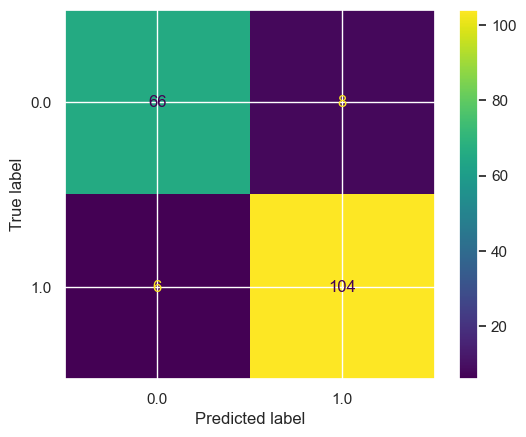

In [276]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_mlp)

**Выводы**

В данной лабораторной работе была рассмотрена задача классификации сердечной недостаточности у человека.
В работе использовались такие алгоритмы как:

- Метод K-ближайших соседей
- Случайный лес
- Ансамбль LightGBM для классификации
- Логистическая регрессия
- Неглубокая нейронная сеть  (1 слой)

Основываясь на полученных результатах лучше всего себя показал алгоритм:

- Неглубокая нейронная сеть ( 1 слой, 300 нейронов)

Значение AUC_ROC на тестовой выборке: 91.8673

Значение recall на тестовой выборке: 94.5455 

Точность на тестовой выборке 92.3913

Алгоритм, который оказался самым быстрым из представленных:

- LogisticRegression()

Время работы = 0.0009963512420654297

Подводя итог, делаем вывод, что предобработка данных и их анализ были выполнены успешно, что и дало вполне приемлемы результат.




Рейтинг алгоритмов ( убывание значения метрик ):

   - MLPClassifier()
   
   - KNeighborsClassifier()
   
   - LGBMClassifier()
   
   - LogisticRegression()
   
   - RandomForestClassifier()
    
( Но на самом деле, если бы мы перебирали параметры по графику, то думаю, что мы могли бы подтянуть точность логистической регресии, случайного леса и градиентного бустинга и рейтинг выглядел бы немного иначе :) )
    